# Wine Quality Prediction 

In [1]:
import os 
from tkinter import E
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import mlflow
import mlflow.sklearn
from mlflow.tracking import MlflowClient

# Hyper Paramater Tunning

In [2]:
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials
from hyperopt.pyll import scope

# ML flow Tracking

In [3]:
import mlflow
#mlflow.set_tracking_uri('http://localhost:5000')
#mlflow.set_tracking_uri("sqlite:///winequality2.db")
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("wine_quality_2")
mlflow.start_run()
run = mlflow.active_run()
print("Active run_id: {}".format(run.info.run_id))

Active run_id: f7102877637c4b9e9fa2cf21b371980e


In [4]:
wine=pd.read_csv('H:\Metaverse\MLprob\mlflow\wine-quality.csv')

In [ ]:
wine.head()

In [ ]:
wine.tail()

In [ ]:
wine.shape

In [ ]:
wine.size

In [5]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine.columns=wine.columns.str.strip()

In [7]:
wine.columns=wine.columns.str.lower()

In [8]:
wine.columns=wine.columns.str.replace(' ','_')

In [9]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
wine[wine.duplicated(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol','quality'],keep=False)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4855,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
4879,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6


In [11]:
wine.drop_duplicates(subset=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol','quality'],keep='first',inplace=True)

In [12]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [13]:
wine.shape

(3961, 12)

In [14]:
wine.size

47532

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3961 non-null   float64
 1   volatile_acidity      3961 non-null   float64
 2   citric_acid           3961 non-null   float64
 3   residual_sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free_sulfur_dioxide   3961 non-null   float64
 6   total_sulfur_dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   ph                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [16]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<Axes: xlabel='quality', ylabel='count'>

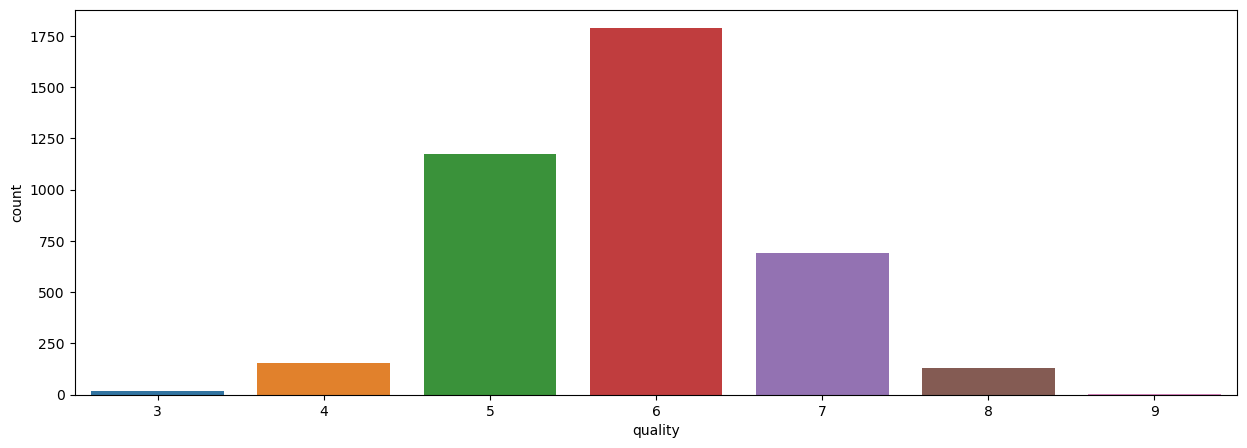

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=wine,x='quality')

In [18]:
wine['quality'].value_counts().to_frame()

,quality
6,1788
5,1175
7,689
4,153
8,131
3,20
9,5


<Axes: xlabel='quality', ylabel='count'>

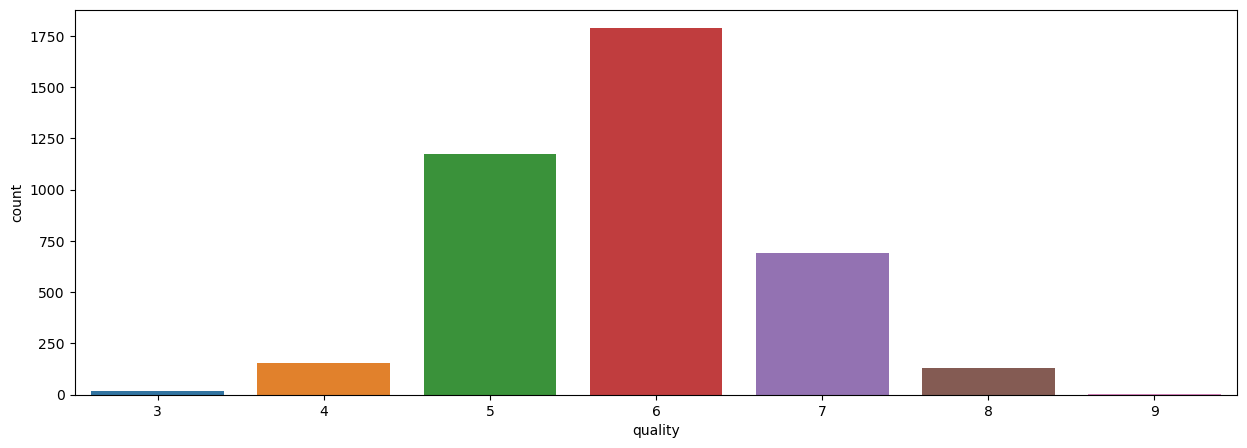

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=wine,x='quality')

In [20]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile_acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric_acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual_sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free_sulfur_dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total_sulfur_dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
ph,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


<Axes: title={'center': 'correlation b/w features'}>

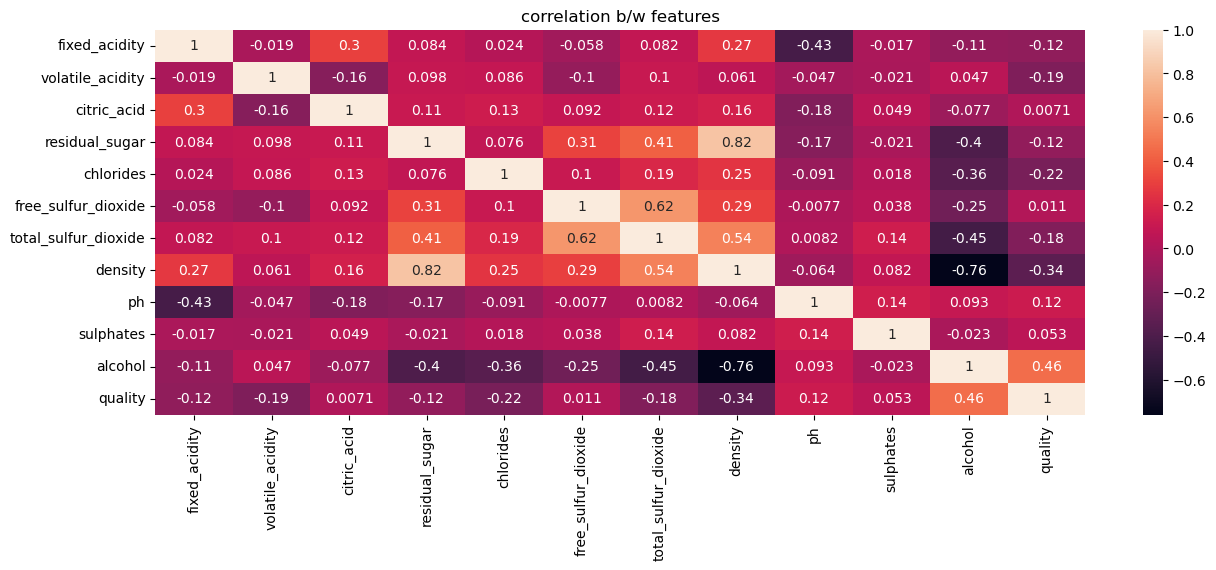

In [21]:
plt.figure(figsize=(15,5))
plt.title('correlation b/w features')
sns.heatmap(wine.corr(),annot=True)

In [22]:
wine_quality_corr=wine.corr()['quality'].to_frame()

<Axes: title={'center': 'correlation of target feature with predictor features'}, xlabel='quality'>

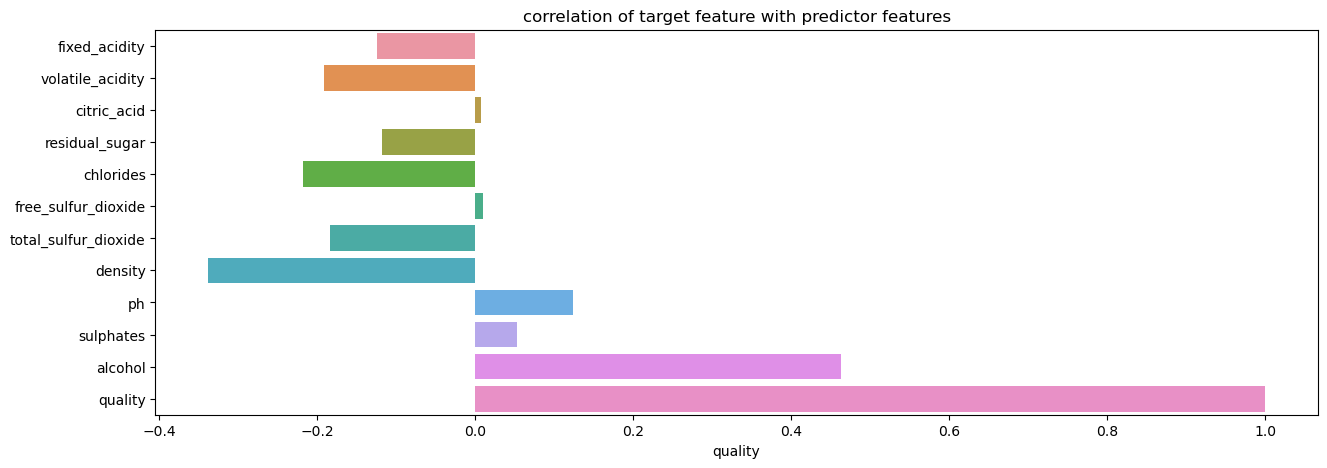

In [23]:
plt.figure(figsize=(15,5))
plt.title('correlation of target feature with predictor features')
sns.barplot(data=wine_quality_corr,y=wine_quality_corr.index,x='quality')

In [24]:
y=wine['quality']
x=wine.drop(['quality'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2772, 11), (1189, 11), (2772,), (1189,))

In [28]:
def evaluate(y,pred):
    rmse =np.sqrt(mean_squared_error(y,pred))
    mae = mean_absolute_error(y,pred)
    r2 = r2_score(y,pred)
    
    return rmse,mae,r2

In [29]:
def get_metrics(y_true, y_pred, y_pred_prob):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    entropy = log_loss(y_true, y_pred_prob)
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2), 'entropy': round(entropy, 2)}

# Model NO- 1- Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression(max_iter=6000)

In [32]:
lr.fit(x_train,y_train)

C:\Users\naveen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=6000)

In [33]:
lr.score(x_train,y_train)

0.5494227994227994

In [34]:
lr.score(x_test,y_test)

0.5332211942809083

In [35]:
y_pred=lr.predict(x_test)

In [37]:


#run = mlflow.start_run(run_name="My model experiment")
 #mlflow.set_experiment("LOgistic Regression")
rmse,mae,r2 = evaluate(y_test,y_pred)
mlflow.set_tag("developer","Naveen")
mlflow.set_tag("Logistic_Reg","Logistic_Regression")
 #mlflow.log_params(params)
mlflow.log_metric("rmse",rmse)
mlflow.log_metric("mae",mae)
mlflow.log_metric("r2",r2)
# mlflow.log_metric("Accuracy",acc)                      
mlflow.sklearn.log_model(lr,"Logistic Regression")
print(f"Logistic Regression Metrics:rmse:{rmse},mae:{mae},r2:{r2}")       


C:\Users\naveen\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
2023/09/11 15:53:36 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under mlflow-artifacts:/686109368148166702/f7102877637c4b9e9fa2cf21b371980e/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the tracking store. If logging to a mlflow server via REST, consider upgrading the server version to MLflow 1.7.0 or above. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.


Logistic Regression Metrics:rmse:0.8304547985373997,mae:0.5349032800672834,r2:0.12609576394241961


In [38]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

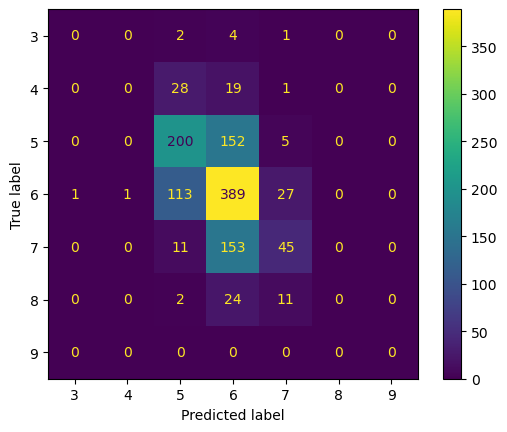

In [39]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [40]:
# close mlflow connection
run_id = run.info.run_uuid
experiment_id = run.info.experiment_id
mlflow.end_run()
print(mlflow.get_artifact_uri())
#print(f'artifact_uri = {mlflow.get_artifact_uri()}')
print("runID: %s" % run_id)

mlflow-artifacts:/686109368148166702/b1e894c2e0ba491d97744847b9ec3eaf/artifacts
runID: f7102877637c4b9e9fa2cf21b371980e


# Model No -2 - Logistic Regression with Solver

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
lr_CV=LogisticRegressionCV(Cs=10,cv=4,solver='liblinear',penalty='l1',max_iter=5000)

In [ ]:
lr_CV.fit(x_train,y_train)

In [ ]:
lr_CV.score(x_train,y_train)

In [ ]:
lr_CV.score(x_test,y_test)

In [ ]:
y_pred=lr_CV.predict(x_test)

In [ ]:
def objective(params):
    with mlflow.start_run():
        rmse,mae,r2 = evaluate(y_test,y_pred)
        mlflow.set_tag("developer","Naveen")
        mlflow.set_tag("Logistic_Reg","Logistic_Regression")
        mlflow.log_params(params)
        mlflow.log_metric("rmse",rmse)
        mlflow.log_metric("mae",mae)
        mlflow.log_metric("r2",r2)
        mlflow.sklearn.log_model(lr_CV,"Logistic Regression")
        print(f"Logistic Regression Metrics:rmse:{rmse},mae:{mae},r2:{r2}")
    return {'loss':rmse,'status':STATUS_OK}

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr_CV.classes_),display_labels=lr_CV.classes_)
cmd.plot()

# Model No -3 KNN Model(K-Nearest Neighbors Algorithm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lr_knn=KNeighborsClassifier(n_neighbors=6,metric='euclidean')

In [ ]:
lr_knn.fit(x_train,y_train)

In [ ]:
lr_knn.score(x_train,y_train)

In [ ]:
lr_knn.score(x_test,y_test)

In [ ]:
y_pred=lr_knn.predict(x_test)

In [ ]:
def objective(params):
    with mlflow.start_run():
        rmse,mae,r2 = evaluate(y_test,y_pred)
        mlflow.set_tag("developer","shaik")
        mlflow.set_tag("KNN","KNN")
        mlflow.log_metric("rmse",rmse)
        mlflow.log_metric("mae",mae)
        mlflow.log_metric("r2",r2)
        mlflow.sklearn.log_model(lr_knn,"KNN")
        print(f"KNN:rmse:{rmse},mae:{mae},r2:{r2}")
    return {'loss':rmse,'status':STATUS_OK}  

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr_knn.classes_),display_labels=lr_knn.classes_)
cmd.plot()

# Model -SVC 

In [ ]:
from sklearn.svm import SVC

In [ ]:
lr_svc=SVC()

In [ ]:
lr_svc.fit(x_train,y_train)

In [ ]:
lr_svc.score(x_train,y_train)

In [ ]:
lr_svc.score(x_test,y_test)

In [ ]:
y_pred=lr_svc.predict(x_test)

In [ ]:
def objective(params):
    with mlflow.start_run():
        rmse,mae,r2 = evaluate(y_test,y_pred)
        mlflow.set_tag("developer","YYYY")
        mlflow.set_tag("SVC","SVC")
        mlflow.log_metric("rmse",rmse)
        mlflow.log_metric("mae",mae)
        mlflow.log_metric("r2",r2)
        mlflow.sklearn.log_model(lr_svc,"SVC")
        print(f"SVC:rmse:{rmse},mae:{mae},r2:{r2}")
    return {'loss':rmse,'status':STATUS_OK} 

In [ ]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr_svc.classes_),display_labels=lr_svc.classes_)
cmd.plot()